En este bloque importamos todas las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px



#from google.colab import drive
#drive.mount('/content/drive')


1:CARGA DE DATOS

En este bloque nos preparamos paera la carga de datos definiendo nuestras rutas.

In [2]:
# ruta lucia
# ruta = "C:/Dropbox/Estudio/Upso/GRUPO-TRABAJO/Laboratorio3/Crimenes.csv"

# ruta heber
ruta= "D:/Dropbox/Estudio/Upso/GRUPO-TRABAJO/BigData/Laboratorio3/Crimenes.csv"

# ruta viviana
#ruta="/content/drive/MyDrive/BIG_DATA/Crimenes.csv"

# ruta pastor
#ruta="C:/Users/pasto/Dropbox/GRUPO-TRABAJO/BigData/Laboratorio3/Crimenes.csv"


Hacemos una previsualizacion para verificar haber cargado correctamente el csv.

In [3]:
df = pd.read_csv(ruta)
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Se fitran los datos sin las regiones pero manteniendo el id. 
Para el analisis se toman los tres delitos, en referencia al la cantidad de poblacion de cada estado.

In [4]:
X1=df[["Asesinatos", "Asaltos",	"Poblacion Urbana",	"Violaciones"]]
X1

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Se aplica la Funcion StandardScaler al df para que tengan media cero y desviacion estandar uno.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [6]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Graficamos los los diferentes comportamientos a diferentes vaores de k, y por el metodo del codo se elije la relación mas eficiente, entre rendimiento y costo computacional.

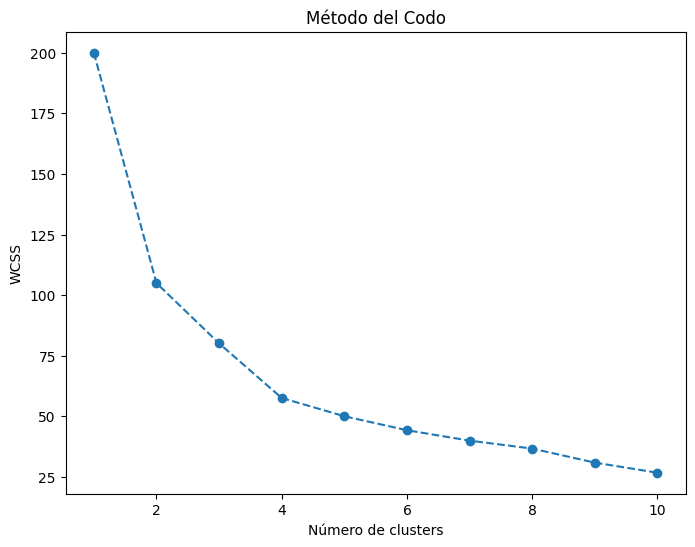

In [7]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

Se elige el valor de k=3 que es donde el grafico muestra el codo.

Se aplica el numero 3 de cluster el KMeans

In [8]:
k_optimo = 3

kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Para encontrar automáticamente el valor de k, analizamos el codo en la curva. buscando el "codo" en la gráfica, que es el punto donde la disminución en WCSS disminuye significativamente y comienza a aplanarse.

Automáticamente es encontrar el punto donde la segunda derivada de la curva es máxima.

En este caso el k fue muy alto en un promedio de 9 se prefiere usar el elegido anteriormente (graficamente) por el costo computacional.

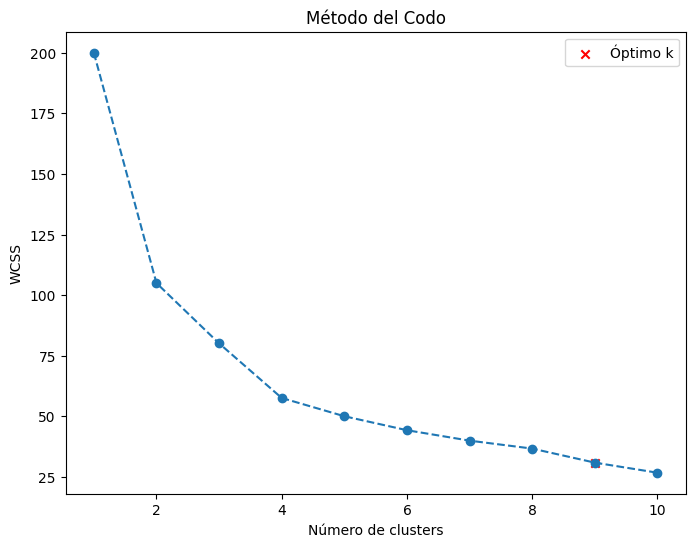

El valor óptimo de k es: 9


In [9]:
from scipy.signal import find_peaks, peak_widths

# Encuentra los picos en la curva
peaks, _ = find_peaks(-np.gradient(wcss))
# Encuentra los anchos de los picos
widths, _, _, _ = peak_widths(-np.gradient(wcss), peaks)

# Encuentra el pico más ancho, que corresponde al codo
optimal_k_index = peaks[np.argmax(widths)]

# Visualiza el método del codo con el punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.scatter(optimal_k_index + 1, wcss[optimal_k_index], c='red', marker='x', label='Óptimo k')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.legend()
plt.show()

# Imprime el valor óptimo de k
print(f'El valor óptimo de k es: {optimal_k_index + 1}')

En los siguientes 3 pasos se obtienen las estadísticas descriptivas de la columnas Asesinatos, Asaltos y Violaciones, agrupandolos en cada grupo cluster de niveles segun cada caso.

In [10]:
cluster_asen = df.groupby('Cluster')['Asesinatos'].describe()
cluster_asen

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,12.165000,2.684904,7.9,10.3,12.15,13.50,17.4
1,16.0,5.656250,1.647207,3.2,4.3,5.95,6.90,8.5
2,14.0,3.971429,2.661529,0.8,2.2,2.65,5.35,9.7


In [11]:
cluster_asal = df.groupby('Cluster')['Asaltos'].describe()
cluster_asal

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,255.250,44.116920,178.0,229.75,254.5,280.50,337.0
1,16.0,138.875,41.175842,46.0,114.50,147.0,159.00,238.0
2,14.0,86.500,38.697545,45.0,56.25,82.0,107.25,190.0


In [12]:
cluster_viol= df.groupby('Cluster')['Violaciones'].describe()
cluster_viol.loc[0,"mean"]
cluster_viol

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,29.16500,8.386473,16.1,23.625,27.35,32.85,46.0
1,16.0,18.78125,5.236439,8.3,15.750,19.40,21.10,29.3
2,14.0,12.70000,3.692196,7.3,9.825,12.05,15.95,19.5


In [13]:
sumacluster=cluster_viol+cluster_asal+cluster_asen
sumacluster

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,60.0,296.580000,55.188297,202.0,263.675,294.00,326.85,400.4
1,48.0,163.312500,48.059488,57.5,134.550,172.35,187.00,275.8
2,42.0,103.171429,45.051270,53.1,68.275,96.70,128.55,219.2


Graficamos cada nivel de cluster en el caso de Asesinatos.  clasificando los niveles de peligrosidad por colores de mayor a menor ( rojo-amarillo-verde)

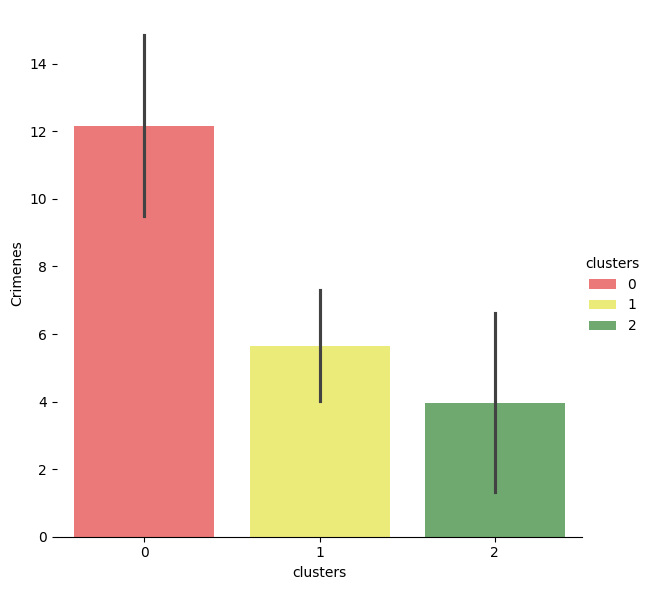

In [56]:

g = sns.catplot(
    data=df, kind="bar",
    x="Cluster", y="Asesinatos", hue="Cluster",
    errorbar="sd", palette=["red", "yellow", "green"], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("clusters", "Crimenes")
g.legend.set_title("clusters")

Cada grupo tendra un valor numerico diferente de cluster, para igualar conceptos generamos una columna con tres datos referentes a los cluster, ('alta','medio','bajo'), de esta manera en cada df tendremos la referencia que corresponde de igual modo en todos los graficos.

In [15]:
# Encuentra el grupo con los mayores valores de Y
grupo_max = sumacluster[sumacluster['mean'] == sumacluster['mean'].max()].index[0]

# Encuentra el grupo con los valores medios de Y
grupo_medio = sumacluster[sumacluster['mean'] == sumacluster['mean'].median()].index[0]

# Encuentra el grupo con los más bajos valores de Y
grupo_min = sumacluster[sumacluster['mean'] == sumacluster['mean'].min()].index[0]

# resultados
print(f"Grupo con los mayores valores: {grupo_max}")
print(f"Grupo con los valores medios: {grupo_medio}")
print(f"Grupo con los más bajos valores: {grupo_min}")

df['Categoria'] = df['Cluster'].apply(lambda x: 'bajo' if x == grupo_min else ("alta" if x==grupo_max else "medio" ))

Grupo con los mayores valores: 0
Grupo con los valores medios: 1
Grupo con los más bajos valores: 2


En el campo "Categoria" esta plasmada la categorización del nivel de crimenes por estado en funcion de todos ellos y la Población Urbana.

In [16]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria
0,Alabama,13.2,236,58,21.2,0,alta
1,Alaska,10.0,263,48,44.5,0,alta
2,Arizona,8.1,294,80,31.0,0,alta
3,Arkansas,8.8,190,50,19.5,2,bajo
4,California,9.0,276,91,40.6,0,alta
5,Colorado,7.9,204,78,38.7,0,alta
6,Connecticut,3.3,110,77,11.1,1,medio
7,Delaware,5.9,238,72,15.8,1,medio
8,Florida,15.4,335,80,31.9,0,alta
9,Georgia,17.4,211,60,25.8,0,alta


Graficamos los Cluster de Asecinatos del df, dando colores a los niveles de alto=rojo, medio=amarillo, bajo=verde, segun como agruparon.

In [17]:
# Aplicar KMeans con n_clusters=3

#color_discrete_map1 = {0: 'red', 1: 'blue', 2: 'green'}

fig = px.scatter(df,x=df["Poblacion Urbana"] ,y=df["Asesinatos"], color="Categoria",symbol="Categoria",
                  hover_data=['Cluster'],color_discrete_map={'alta': 'red', 'media': 'yellow', 'baja': 'green'})
fig.show()


Se genera un diagrama de caja (boxplot) que representa la distribución estadística de los asesinatos en diferentes categorías y niveles de clúster. Y manteniendo los colores representativos

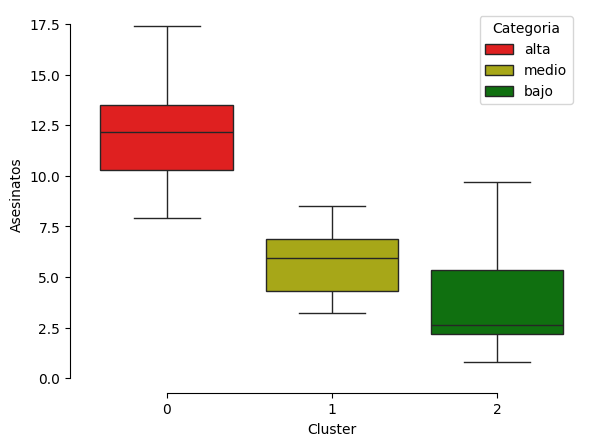

In [18]:
import seaborn as sns

sns.boxplot(x="Cluster", y="Asesinatos",
            hue="Categoria", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)


Dado que el df contiene la informacion de cad aestado de los EEUU, se agregan un campo que hace referencia al los Codigos postales para poder representar geograficamente con colores los niveles de peligrosidad.

In [19]:
estados_usa = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_estados = pd.DataFrame(list(estados_usa.items()), columns=['Estado', 'Abreviatura'])
df_map=df[["Estado","Categoria"]]
df_estados["Estado"]==df_map["Estado"]
df_estados["Peligrosidad"]=df_map[["Categoria"]]
fig = px.choropleth(df_estados, locations="Abreviatura", locationmode='USA-states',color='Peligrosidad',
                    color_discrete_map={'alta': 'red', 'media': 'yellow', 'baja': 'green'},                        
                    scope="usa",  title= 'Peligrosidad de crimenes por  Estados'
                    )

fig.show()


In [20]:
df_estados

,Estado,Abreviatura,Peligrosidad
0,Alabama,AL,alta
1,Alaska,AK,alta
2,Arizona,AZ,alta
3,Arkansas,AR,bajo
4,California,CA,alta
5,Colorado,CO,alta
6,Connecticut,CT,medio
7,Delaware,DE,medio
8,Florida,FL,alta
9,Georgia,GA,alta


In [21]:
df["Estado_Abre"]=df_estados[["Abreviatura"]]

In [22]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Estado_Abre
0,Alabama,13.2,236,58,21.2,0,alta,AL
1,Alaska,10.0,263,48,44.5,0,alta,AK
2,Arizona,8.1,294,80,31.0,0,alta,AZ
3,Arkansas,8.8,190,50,19.5,2,bajo,AR
4,California,9.0,276,91,40.6,0,alta,CA
5,Colorado,7.9,204,78,38.7,0,alta,CO
6,Connecticut,3.3,110,77,11.1,1,medio,CT
7,Delaware,5.9,238,72,15.8,1,medio,DE
8,Florida,15.4,335,80,31.9,0,alta,FL
9,Georgia,17.4,211,60,25.8,0,alta,GA


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EN ESTE PUNTO SE REALIZA DE OTRA MANERA.
Se analiza cada tipo de crimen por separado en relación a la Poblacion Urbana

1) ASALTOS 

Se genera un df con Asaltos y Poblacion

In [23]:
 
X2=df[[	"Asaltos",	"Poblacion Urbana"]]

Escala los datos para que tengan media cero y desviación estándar uno

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

Se busca el número óptimo de clusters utilizando el método del codo

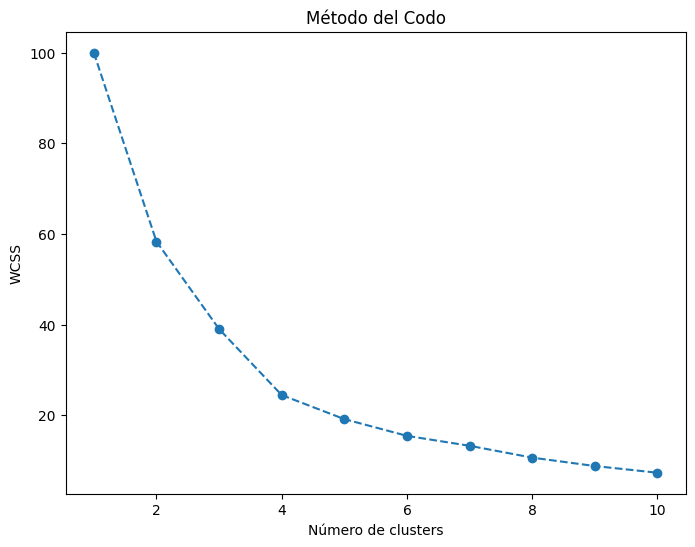

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

Se elige k=3 y se aplica kMeans

In [26]:
k_optimo = 3 
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Clus_asalto'] = kmeans.fit_predict(X_scaled)


Se obtienen las estadísticas descriptivas de la columna ASALTOS

In [27]:

cluster_solo_asaltos = df.groupby('Clus_asalto')['Asaltos'].describe()
cluster_solo_asaltos

,count,mean,std,min,25%,50%,75%,max
Clus_asalto,,,,,,,,
0,11.0,254.272727,46.201928,188.0,223.5,259.0,282.00,337.0
1,17.0,92.117647,35.455751,45.0,57.0,86.0,113.00,161.0
2,22.0,189.772727,72.059454,46.0,146.0,176.0,251.25,335.0


Se separan para tener el mismo tipo de grupo que el analisis anterior, y NORMALIZAR que figuren en el mismo cluster 0=alta 1=media 2=baja

In [28]:
grupo_max = cluster_solo_asaltos[cluster_solo_asaltos['mean'] == cluster_solo_asaltos['mean'].max()].index[0]
grupo_medio = cluster_solo_asaltos[cluster_solo_asaltos['mean'] == cluster_solo_asaltos['mean'].median()].index[0]
grupo_min = cluster_solo_asaltos[cluster_solo_asaltos['mean'] == cluster_solo_asaltos['mean'].min()].index[0]


df['Cat_asalto'] = df['Clus_asalto'].apply(lambda x: 'bajo' if x == grupo_min else ("alta" if x==grupo_max else "medio" ))
df['Clus_asalto_nor'] = df['Clus_asalto'].apply(lambda x: 2 if x == grupo_min else (0 if x==grupo_max else 1 ))
df.drop('Clus_asalto', axis=1, inplace=True)

Se genera un diagrama de caja (boxplot) que representa la distribución estadística de los ASALTOS en diferentes categorías y niveles de clúster. Y manteniendo los colores representativos

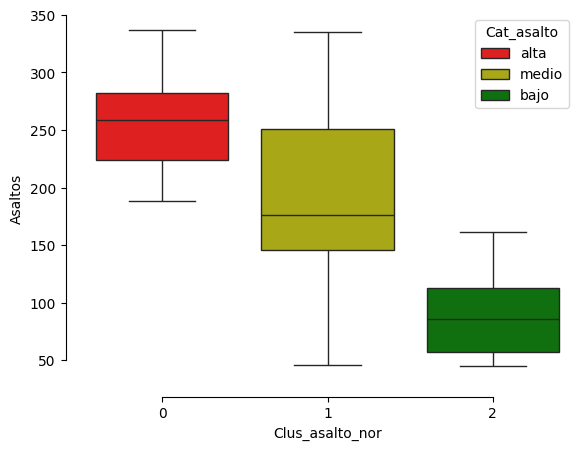

In [29]:
sns.boxplot(x="Clus_asalto_nor", y="Asaltos",
            hue="Cat_asalto", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)

2) ASESINATOS

Se genera un df con ASESINATOS y Poblacion

mismos pasos anteriores en asalto - para obtener una columna en el df general de los asesinatos normalizados con el k=3

In [30]:

X3=df[["Asesinatos", "Poblacion Urbana"]]
çscaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)

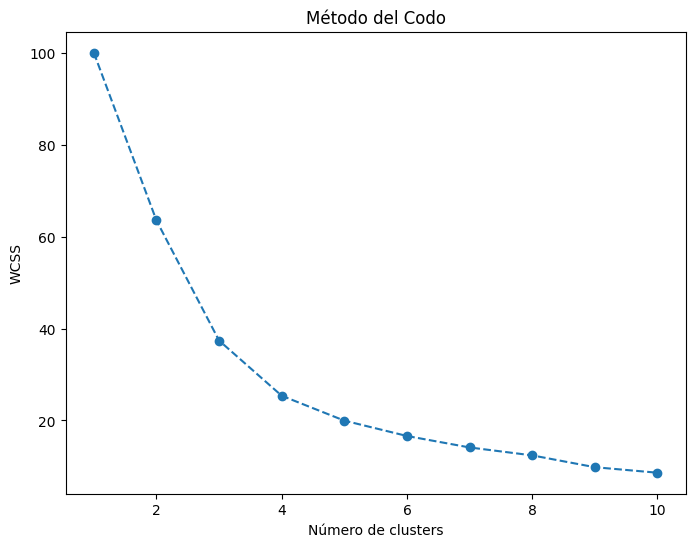

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [32]:
k_optimo = 3# ajusta este valor  método del codo
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Clus_asesinato'] = kmeans.fit_predict(X_scaled)

In [33]:
cluster_solo_asesinatos = df.groupby('Clus_asesinato')['Asesinatos'].describe()

grupo_max = cluster_solo_asesinatos[cluster_solo_asesinatos['mean'] == cluster_solo_asesinatos['mean'].max()].index[0]
grupo_medio = cluster_solo_asesinatos[cluster_solo_asesinatos['mean'] == cluster_solo_asesinatos['mean'].median()].index[0]
grupo_min = cluster_solo_asesinatos[cluster_solo_asesinatos['mean'] == cluster_solo_asesinatos['mean'].min()].index[0]


df['Cat_asesinato'] = df['Clus_asesinato'].apply(lambda x: 'bajo' if x == grupo_min else ("alta" if x==grupo_max else "medio" ))
df['Clus_asesinato_nor'] = df['Clus_asesinato'].apply(lambda x: 2 if x == grupo_min else (0 if x==grupo_max else 1 ))
df.drop('Clus_asesinato', axis=1, inplace=True)

Se genera un diagrama de caja (boxplot) que representa la distribución estadística de los ASESINATOS en diferentes categorías y niveles de clúster. Y manteniendo los colores representativos

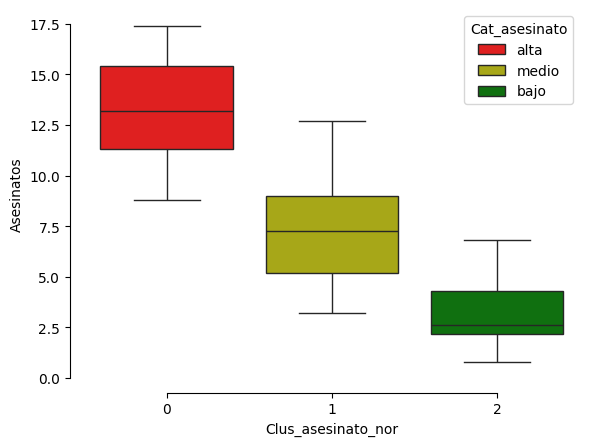

In [34]:
sns.boxplot(x="Clus_asesinato_nor", y="Asesinatos",
            hue="Cat_asesinato", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)


3) VIOLACIONES

Se genera un df con violaciones y población.
mismos pasos anteriores en asalto y asesinatos - para obtener una columna en el df general de los asesinatos normalizados con el k=3

In [35]:

X4=df[["Violaciones", "Poblacion Urbana"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X4)

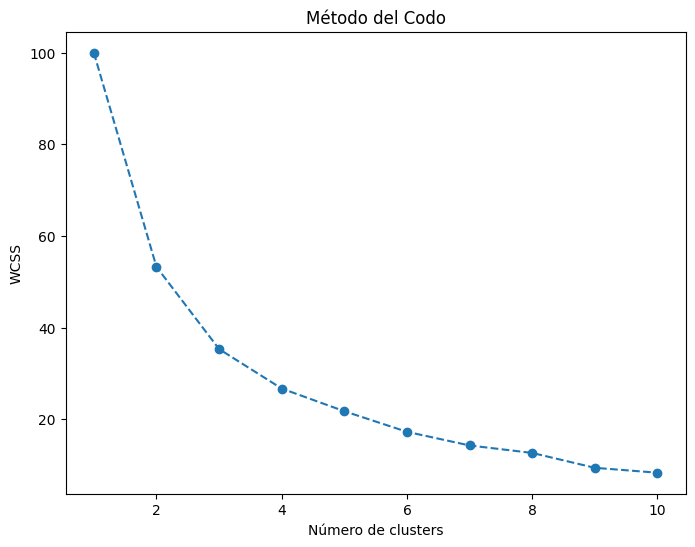

In [36]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [37]:
k_optimo = 3# ajusta este valor  método del codo
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Clus_violacion'] = kmeans.fit_predict(X_scaled)

se NORMALIZA para que figuren el mismo numero de cluster en cada categoria

In [38]:
cluster_solo_violaciones = df.groupby('Clus_violacion')['Violaciones'].describe()

grupo_max = cluster_solo_violaciones[cluster_solo_violaciones['mean'] == cluster_solo_violaciones['mean'].max()].index[0]
grupo_medio = cluster_solo_violaciones[cluster_solo_violaciones['mean'] == cluster_solo_violaciones['mean'].median()].index[0]
grupo_min = cluster_solo_violaciones[cluster_solo_violaciones['mean'] == cluster_solo_violaciones['mean'].min()].index[0]


df['Cat_violacion'] = df['Clus_violacion'].apply(lambda x: 'bajo' if x == grupo_min else ("alta" if x==grupo_max else "medio" ))
df['Clus_violacion_nor'] = df['Clus_violacion'].apply(lambda x: 2 if x == grupo_min else (0 if x==grupo_max else 1 ))
df.drop('Clus_violacion', axis=1, inplace=True)

In [39]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Estado_Abre,Cat_asalto,Clus_asalto_nor,Cat_asesinato,Clus_asesinato_nor,Cat_violacion,Clus_violacion_nor
0,Alabama,13.2,236,58,21.2,0,alta,AL,alta,0,alta,0,bajo,2
1,Alaska,10.0,263,48,44.5,0,alta,AK,alta,0,alta,0,alta,0
2,Arizona,8.1,294,80,31.0,0,alta,AZ,medio,1,medio,1,alta,0
3,Arkansas,8.8,190,50,19.5,2,bajo,AR,alta,0,alta,0,bajo,2
4,California,9.0,276,91,40.6,0,alta,CA,medio,1,medio,1,alta,0
5,Colorado,7.9,204,78,38.7,0,alta,CO,medio,1,medio,1,alta,0
6,Connecticut,3.3,110,77,11.1,1,medio,CT,medio,1,medio,1,medio,1
7,Delaware,5.9,238,72,15.8,1,medio,DE,medio,1,medio,1,medio,1
8,Florida,15.4,335,80,31.9,0,alta,FL,medio,1,alta,0,alta,0
9,Georgia,17.4,211,60,25.8,0,alta,GA,alta,0,alta,0,alta,0


<Axes: xlabel='Clus_violacion_nor', ylabel='Violaciones'>

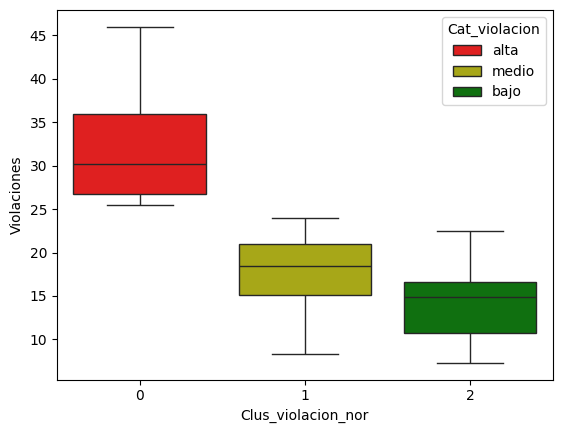

In [40]:

sns.boxplot(x="Clus_violacion_nor", y="Violaciones",
            hue="Cat_violacion", palette=["r", "y","g"],
            data=df)
#sns.despine(offset=10, trim=True)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Habiendo analizado cada delito de manera independiente, simamos los resultados, como estan normalizados cada numero de clustes pertenece a una categoria caracteristica:

0=alta 1=media 2=baja

Se suman los cluster normalizados a una general, de esta manera se obtendran valores de 0 a 6, con los valos mas bajos como mas peligrosos, se divide por 3 para obtener el promedio y de esta manera volver a normalizar el resultado y poder comparar.

In [48]:
#sumamos los clusters
df['suma_crimenes_nor']=(df['Clus_asalto_nor']+df['Clus_asesinato_nor']+df['Clus_violacion_nor'])
df['suma_nor']=(df['suma_crimenes_nor']/3).round().astype(int)

df['Cat_suma_crimenes'] = df['suma_nor'].apply(lambda x: 'bajo' if x == 2 else ("alta" if x==0 else "medio" ))

df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Estado_Abre,Cat_asalto,Clus_asalto_nor,Cat_asesinato,Clus_asesinato_nor,Cat_violacion,Clus_violacion_nor,suma_nor,Cat_suma_crimenes,suma_crimenes_nor
0,Alabama,13.2,236,58,21.2,0,alta,AL,alta,0,alta,0,bajo,2,1,medio,2
1,Alaska,10.0,263,48,44.5,0,alta,AK,alta,0,alta,0,alta,0,0,alta,0
2,Arizona,8.1,294,80,31.0,0,alta,AZ,medio,1,medio,1,alta,0,1,medio,2
3,Arkansas,8.8,190,50,19.5,2,bajo,AR,alta,0,alta,0,bajo,2,1,medio,2
4,California,9.0,276,91,40.6,0,alta,CA,medio,1,medio,1,alta,0,1,medio,2
5,Colorado,7.9,204,78,38.7,0,alta,CO,medio,1,medio,1,alta,0,1,medio,2
6,Connecticut,3.3,110,77,11.1,1,medio,CT,medio,1,medio,1,medio,1,1,medio,3
7,Delaware,5.9,238,72,15.8,1,medio,DE,medio,1,medio,1,medio,1,1,medio,3
8,Florida,15.4,335,80,31.9,0,alta,FL,medio,1,alta,0,alta,0,0,alta,1
9,Georgia,17.4,211,60,25.8,0,alta,GA,alta,0,alta,0,alta,0,0,alta,0


Como final, se grafica el resultado normalizado de la sumatoria de cada tipo de crimen analizado por separado y luego sumado.

In [49]:

df_estados = pd.DataFrame(list(estados_usa.items()), columns=['Estado', 'Abreviatura'])
df_map=df[["Estado","Cat_suma_crimenes"]]
df_estados["Estado"]==df_map["Estado"]
df_estados["Peligrosidad"]=df_map[["Cat_suma_crimenes"]]
fig = px.choropleth(df_estados, locations="Abreviatura", locationmode='USA-states',color='Peligrosidad',
                    color_discrete_map={'alta': 'red', 'media': 'yellow', 'baja': 'green'},                        
                    scope="usa",  title= 'Peligrosidad por  Estados total normalizado'
                    )

fig.show()